In [4]:
import numpy as np
import pandas as pd

# Define ranges for simulation inputs based on historical and hypothetical scenarios
n_simulations = 10000

np.random.seed(42)  # For reproducibility

# Generate synthetic data
data = {
    "nukes_used": np.random.randint(1, 50, size=n_simulations),
    "avg_yield_kt": np.random.uniform(15, 1000, size=n_simulations),  # Hiroshima was ~15 kt, modern warheads up to 1000 kt
    "target_city_population": np.random.uniform(1e5, 2e7, size=n_simulations),
    "urbanization_level": np.random.uniform(0.4, 1.0, size=n_simulations),  # Proportion of population in urban areas
    "soot_emission_Tg": np.random.uniform(0.1, 10, size=n_simulations),  # in Teragrams (based on nuclear winter models)
}

# Derived features
data["total_targeted_population"] = data["target_city_population"] * data["nukes_used"] * data["urbanization_level"]
data["human_lives_lost_millions"] = data["total_targeted_population"] * np.random.uniform(0.2, 0.8, size=n_simulations) / 1e6
data["gdp_impact_pct"] = np.clip(data["nukes_used"] * np.random.uniform(0.5, 1.5, size=n_simulations), 5, 100)
data["expected_global_temp_drop_C"] = data["soot_emission_Tg"] * np.random.uniform(0.05, 0.2, size=n_simulations)
data["estimated_famine_risk_millions"] = data["expected_global_temp_drop_C"] * np.random.uniform(50, 500, size=n_simulations)

# Create DataFrame
df_sim = pd.DataFrame(data)
df_sim.head()


,nukes_used,avg_yield_kt,target_city_population,urbanization_level,soot_emission_Tg,total_targeted_population,human_lives_lost_millions,gdp_impact_pct,expected_global_temp_drop_C,estimated_famine_risk_millions
0,39,305.184283,1.391274e+07,0.990425,9.783658,5.374016e+08,310.946392,31.619361,1.129666,372.051411
1,29,269.824494,1.835747e+07,0.510680,9.676484,2.718688e+08,120.676344,25.062099,1.283615,242.577958
2,15,40.507629,1.454099e+07,0.678623,0.162218,1.480178e+08,114.582913,13.183615,0.025936,3.211392
3,43,295.933568,1.584803e+06,0.783007,5.369111,5.335926e+07,38.052925,29.510693,0.973933,374.730463
4,8,560.660401,8.117623e+06,0.927684,3.435501,6.024470e+07,14.696416,8.089350,0.477012,67.670174


In [3]:
# Save the DataFrame to a CSV file
df_sim.to_csv('nuclear_winter_simulations.csv', index=False)

# Display a message to confirm the download
print("DataFrame saved to 'nuclear_winter_simulations.csv'")

from google.colab import files
files.download('nuclear_winter_simulations.csv')


DataFrame saved to 'nuclear_winter_simulations.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

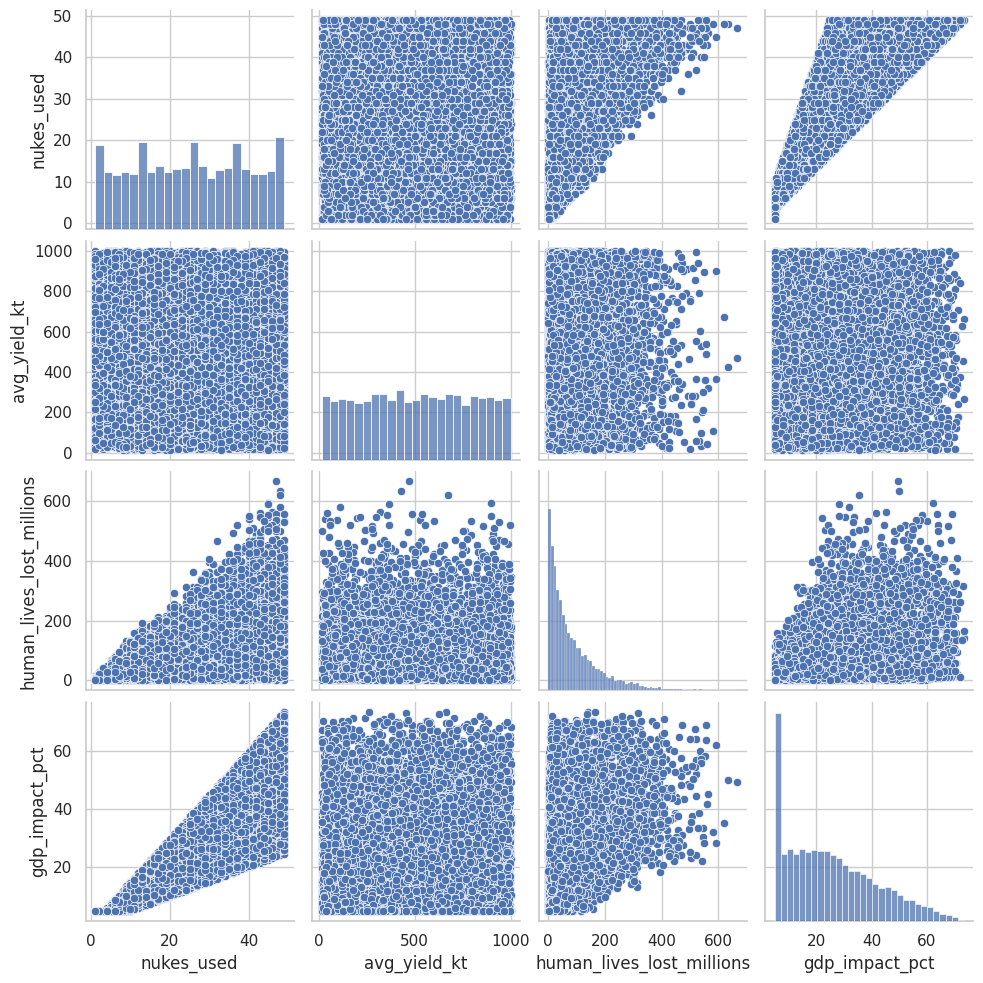

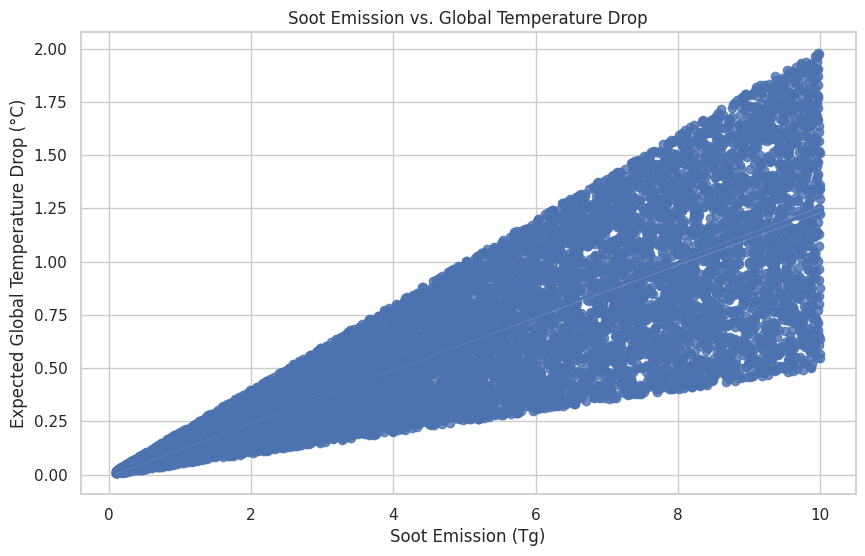

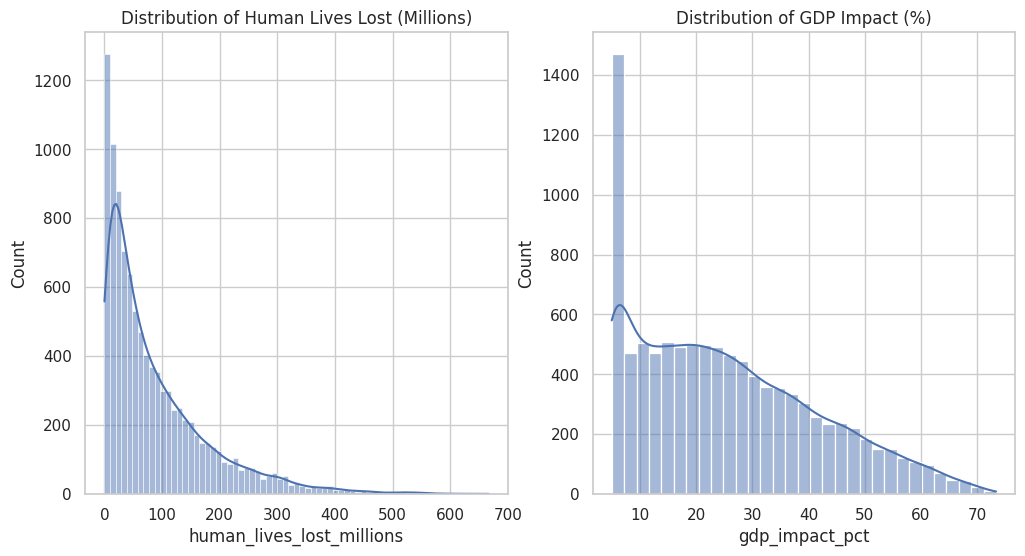

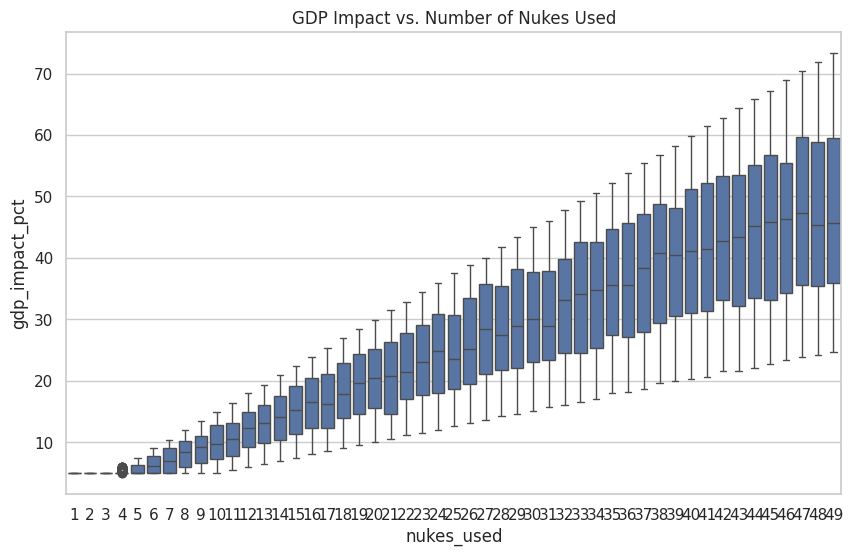

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_sim is already created from the previous code

# Visualize relationships between variables
sns.pairplot(df_sim[['nukes_used', 'avg_yield_kt', 'human_lives_lost_millions', 'gdp_impact_pct']])
plt.show()

# Analyze soot emission impact on temperature drop
plt.figure(figsize=(10, 6))
sns.regplot(x='soot_emission_Tg', y='expected_global_temp_drop_C', data=df_sim)
plt.title('Soot Emission vs. Global Temperature Drop')
plt.xlabel('Soot Emission (Tg)')
plt.ylabel('Expected Global Temperature Drop (°C)')
plt.show()

# Analyze the distribution of key variables
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_sim['human_lives_lost_millions'], kde=True)
plt.title('Distribution of Human Lives Lost (Millions)')

plt.subplot(1, 2, 2)
sns.histplot(df_sim['gdp_impact_pct'], kde=True)
plt.title('Distribution of GDP Impact (%)')
plt.show()

# More visualizations can be added as needed, exploring other variables and relationships.
# Example: Boxplot for GDP impact across different ranges of nukes used
plt.figure(figsize=(10,6))
sns.boxplot(x='nukes_used', y='gdp_impact_pct', data=df_sim)
plt.title('GDP Impact vs. Number of Nukes Used')
plt.show()
